# Introdução

Este notebook tem como objetivo realizar uma análise exploratória dos dados de casas para alugar no Brasil e, com isso, verificar as relações existentes entre os diferentes valores (aluguel, conodomínio, seguro incêndio e IPTU) e como as outras variáveis do *dataset* influenciam nesses números. Além disso, serão feitas outras verificações, como as cidades mais caras e mais baratas para se viver.

Os dados foram obtidos com um *web crawler* (o site não foi especificado) e são de 2020. Por isso, esta EDA têm um objetivo estritamente de aprendizado, pois não se sabe se os dados são confiáveis (o *crawler* está sujeito a erros e, como veremos adiante, existem muitos *outliers* nos dados) ou se estão atualizados.

Esperamos, ao final da análise, entender melhor como cada característica de um imóvel influencia em seus preços de aluguel, condomínio, IPTU e seguro incêndio, bem como saber quais são as características que mais aparecem nos imóveis.

O *dataset* pode ser encontrado no link a seguir: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent

Colunas da tabela:

* `city`: Cidade em que o imóvel está localizado.
* `area`: A área do imóvel.
* `rooms`: Quantidade de quartos do imóvel.
* `bathroom`: Quantidade de banheiros do imóvel.
* `parking spaces`: Quantidade de vagas de garagem do imóvel.
* `floor`: Andar do imóvel.
* `animal`: Se aceita animais.
* `furniture`: Se é mobiliado.
* `hoa (R$)`: Valor da taxa de condominio (*homeowners association tax*), em reais.
* `rent amount (R$)`: Valor do aluguel, em reais.
* `property tax (R$)`: Valor do IPTU, em reais.
* `fire insurance (R$)`: Valor do seguro incêndio, em reais.
* `total (R$)`: Valor total (soma das 4 colunas anteriores), em reais.

# Importando as Bibliotecas

A seguir, vamos importar as bibliotecas usadas nesta análise. São elas: numpy, pandas, matplotlib (mais especificamente o pacote pyplot), seaborn e scipy (mais especificamente o pacote stats).

In [1]:
# Bibliotecas para análise de dados
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para análises estatísticas
from scipy.stats import pearsonr, spearmanr

# Configuração para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Usar setilo do ggplot nos gráficos
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv
/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv


# Carregando os Dados

A primeira coisa a se fazer é carregar os dados que serão utilizados. Para isso, criamos uma variável para armazenar o caminho até o arquivo e, em seguida, lemos o arquivo CSV e armazenamos em uma variável chamada `houses_df`.

In [2]:
houses_file_path = '/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv'
houses_df = pd.read_csv(houses_file_path)

# Primeiras Informações

Agora, podemos inspecionar alguns elementos básicos do nosso *dataframe*. Vamos começar visualizando as primeiras linhas dele.

In [3]:
houses_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Podemos também verificar algumas estatísticas básicas e o formato do nossos dados. Vamos fazer isso a seguir.

In [4]:
houses_df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [5]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericas = houses_df.select_dtypes(include=numerics)
nao_numericas = houses_df.select_dtypes(exclude=numerics)

print(f'O dataframe possui {houses_df.shape[0]} linhas e {houses_df.shape[1]} colunas. Dessas {houses_df.shape[1]} colunas, {numericas.shape[1]} são numéricas e {nao_numericas.shape[1]} são não numéricas.')

O dataframe possui 10692 linhas e 13 colunas. Dessas 13 colunas, 9 são numéricas e 4 são não numéricas.


Algo que podemos ver logo de cara é que, **aparentemente**, não temos dados faltantes, já que temos 10692 linhas no nosso *dataframe* e, em todas as colunas, as 10692 linhas são não-nulas. Isso pode não ser verdade, pois os dados faltantes podem ter sido substituídos por algum valor (como 0, por exemplo) e, por isso, é importante investigar bem os dados no começo da análise.

A priori, algumas coisas já chamam a atenção. A primeira é em relação ao `hoa` (*Homeowners Association Tax*), que é a famosa taxa de condomínio. Nas estatísticas básicas dos dados, é possível observar que o menor valor que aparece nessa coluna é 0. Como existem imóveis que não são de condomínio, consideraremos que esse não é um dado faltante.

A segunda coisa que chama a atenção é em relação à `property tax`, que é o IPTU, que também tem 0 como menor valor apresentado. As regras para isenção do IPTU são bem restritas e não dizem respeito ao imóvel que está para alugar, mas sim à condição financeira do dono. Não obstante, considerando que os dados foram coletados através de um *crowler* na internet (informação fornecida pelo criador do *dataset*), é bem provável que não havia a informação do valor do IPTU na página e tenhamos aqui dados faltantes. Para o propósito dessa análise, porém, vamos considerar que os imóveis realmente pudessem estar isentos de IPTU.

Por fim, algo que causa uma certa dúvida no início (ao analisar somente as primeiras linhas do *dataframe*) é a coluna `parking spaces`. Não sabemos se ela é uma entrada binária (0 indicando que não há garagens e 1 indicando que há garagens) ou se essa variável pode assumir outros valores. Ao observar as estatísticas, vemos que ela representa o número de garagens e pode assumir um valor maior que 1.

Além disso, das 13 *features*, 9 são numéricas e 4 são categóricas.

# Distribuição dos Dados

Uma primeira coisa interessante a se observar é a distribuição dos dados. Vamos verificar a distribuição para o valor total e para o preço do aluguel.

## *Boxplots*

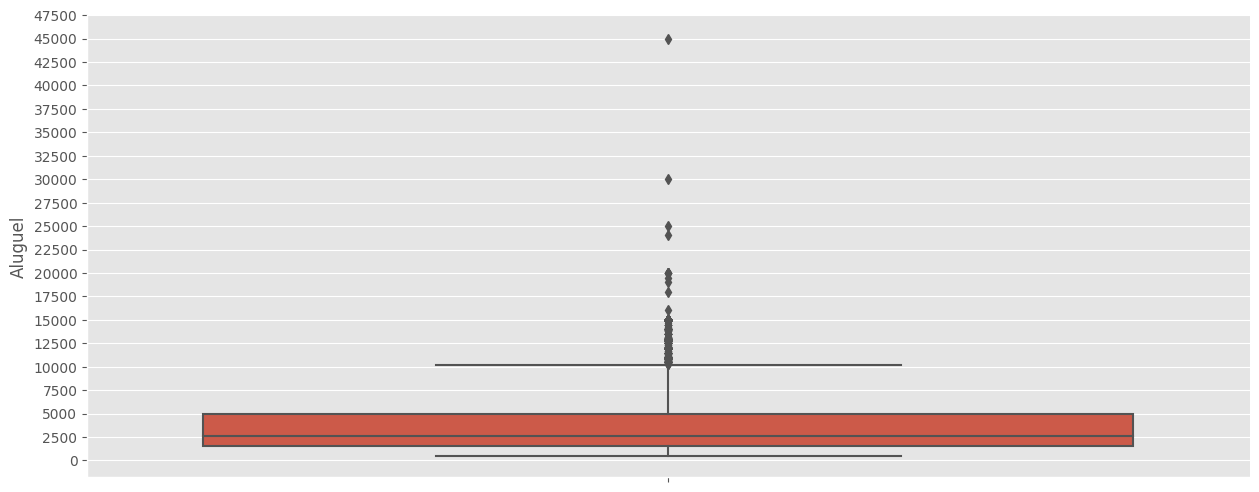

In [7]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=houses_df, y='rent amount (R$)')
plt.ylabel('Aluguel')
plt.yticks(range(0, 50000, 2500))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

É possível perceber que os nosso dados de aluguel possuem muitos *outliers*. Nós iremos tratá-los utilizando o método de Tukey.

## Histogramas

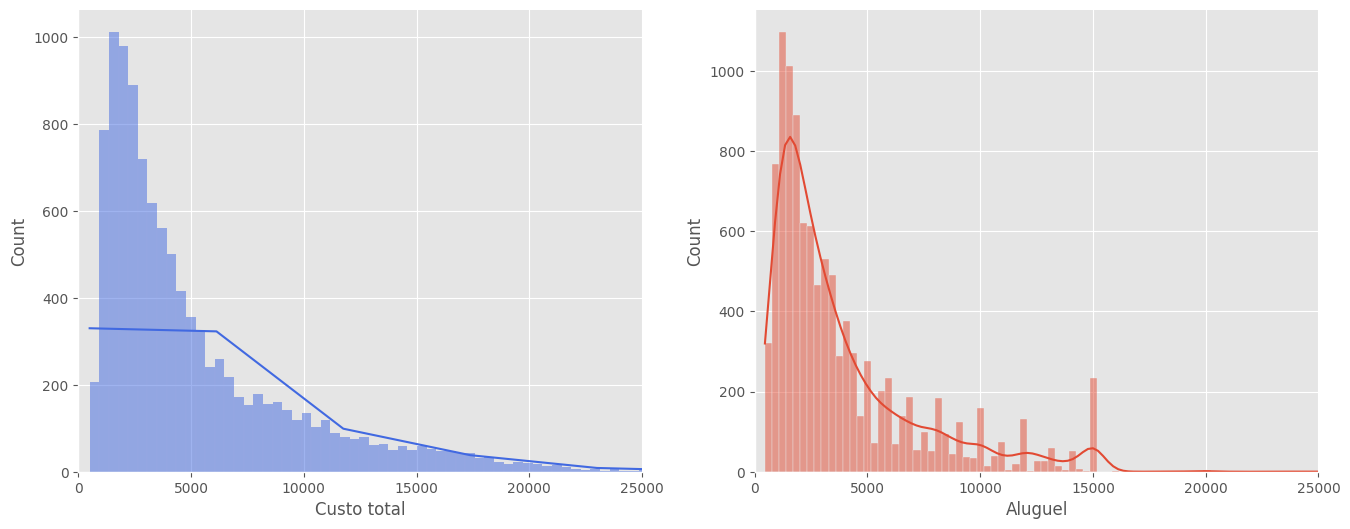

In [8]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
sns.histplot(data=houses_df, x='total (R$)', kde=True, color='royalblue')
plt.xlabel('Custo total')
plt.xlim(0, 25000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(122)
sns.histplot(data=houses_df, x='rent amount (R$)', kde=True)
plt.xlabel('Aluguel')
plt.xlim(0, 25000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

A disposição de ambos os dados aparentam seguir uma **distribuição log-normal**. Essa informação nos será útil mais adiante.

# Quantas Cidades?

Temos informações de casas coletadas ao redor de quantas cidades? Vamos verificar o número de entradas únicas para a coluna `city` do *dataframe*.

In [9]:
print(f"Existem {houses_df['city'].nunique()} cidades diferentes no dataset.")

Existem 5 cidades diferentes no dataset.


# Quantidade de Imoveis Por Cidade

Temos casas de 5 cidades diferentes. E qual será que é a quantidade de casas em cada uma das cidades? Vamos plotar um gráfico de barras para verificar isso.

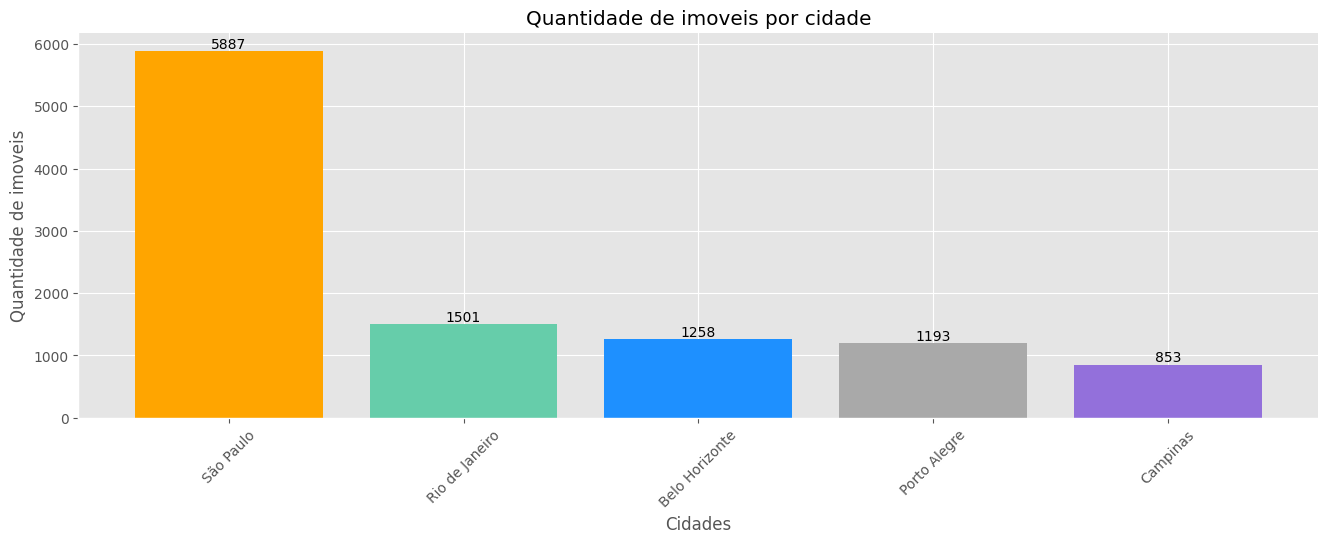

In [10]:
cities_counts = houses_df['city'].value_counts()

plt.figure(figsize=(16, 5))

plt.bar(x=cities_counts.index, height=cities_counts.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Quantidade de imoveis por cidade')
plt.xlabel('Cidades')
plt.ylabel('Quantidade de imoveis')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(cities_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

É possível perceber que a grande maioria das casas em questão estão localizadas em São Paulo, o que faz total sentido, já que São Paulo é uma cidade muito maior do que as demais. Além isso, Campinas é a cidade com o menor número de casas observadas porque é a menor cidade dentre as 5 e a única que não é uma capital.

# Casas Por Habitante

Como vimos, São Paulo é a cidade com o maior numero de imoveis. Isso é natural, já que São Paulo é maior cidade do *dataframe*. Mas qual será que é a cidade com mais imoveis proporcionalmente ao número de habitantes? Veremos isso a seguir.

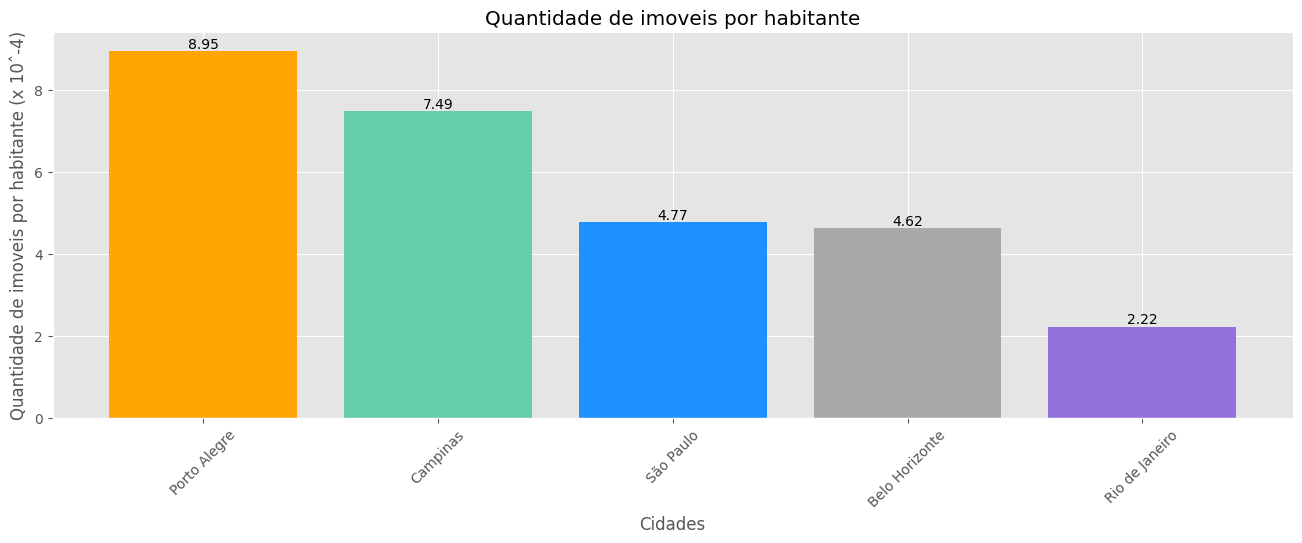

In [11]:
# Definição de um dicionário com a quantidade de habitantes por cidade
population = {'São Paulo': 12330000, 'Campinas':1139047, 'Belo Horizonte': 2722000, 'Porto Alegre': 1332570, 'Rio de Janeiro': 6748000}

# Criação de uma cópia do dataframe original, para não modificarmos ele
population_df = houses_df.copy()

# Criação da coluna "population" no novo dataframe, sendo os valores dela um mapeamento das chaves do nosso dicionário para os seus valores
population_df['population'] = population_df['city'].map(population)

# Agrupamento por cidade e contagem da quantidade de vezes que cada uma aparece
population_df = population_df.groupby('city').agg({'city': 'size', 'population': 'first'})

# Renomeação dos nomes das colunas
population_df = population_df.rename(columns={'city': 'amount'})

# Calculo de casas por habitante
population_df['houses/hab'] = (population_df['amount'] / population_df['population']) * 1e4
population_df.sort_values(by='houses/hab', axis=0, ascending=False, inplace=True)

plt.figure(figsize=(16, 5))

plt.bar(x=population_df.index, height=population_df['houses/hab'], color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Quantidade de imoveis por habitante')
plt.xlabel('Cidades')
plt.ylabel('Quantidade de imoveis por habitante (x 10ˆ-4)')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(population_df['houses/hab']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

Bom, parece que São Paulo não tem tantos imóveis assim para alugar, se pensarmos proporcionalmente em relação aos habitantes. Porto Alegre é a cidade que mais tem imoveis "sobrando" para alugar.

# Quantidade de Quartos e de Andares

As casas analisadas possuem quantos quartos e estão em quais andares? Os gráficos a seguir mostram a quantidade de casas com cada uma das quantidades de quartos e em quais andares se localizam.

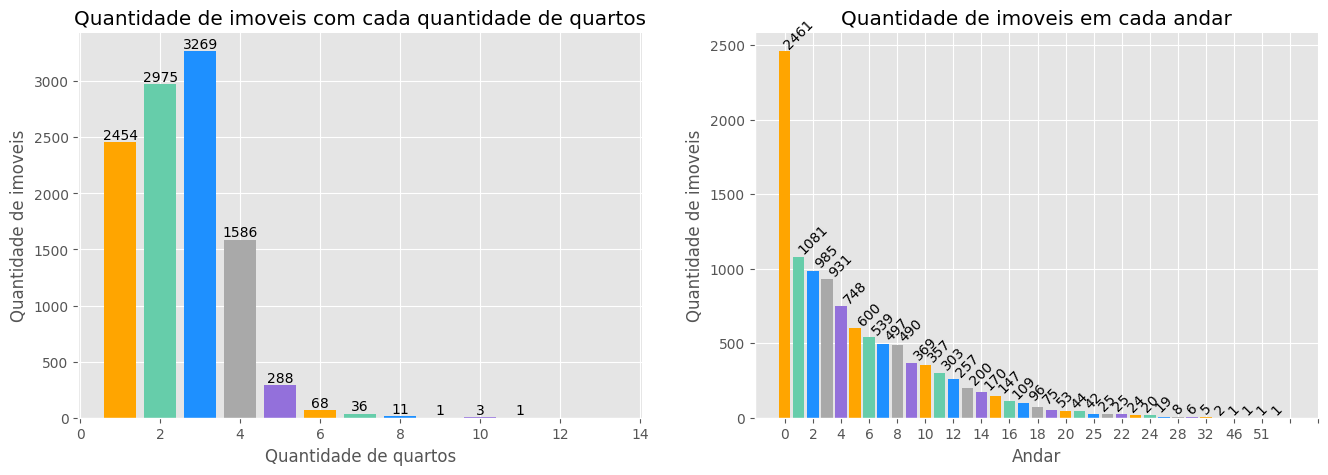

In [18]:
room_counts = houses_df['rooms'].value_counts()
room_counts = room_counts.sort_index()
houses_df['floor'] = houses_df['floor'].replace('-', '0')
floor_counts = houses_df['floor'].value_counts()

plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.bar(x=room_counts.index, height=room_counts.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Quantidade de imoveis com cada quantidade de quartos')
plt.xlabel('Quantidade de quartos')
plt.ylabel('Quantidade de imoveis')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(room_counts.values):
    plt.gca().text(i+1, v, str(v), ha='center', va='bottom')

plt.subplot(122)
plt.bar(x=floor_counts.index, height=floor_counts.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.xticks(range(0, 40, 2))
plt.title('Quantidade de imoveis em cada andar')
plt.xlabel('Andar')
plt.ylabel('Quantidade de imoveis')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(floor_counts.values):
    plt.gca().text(i+1, v, str(v), ha='center', va='bottom', rotation=45)

plt.show()

In [16]:
floor_counts.head(10)

floor
-    2461
1    1081
2     985
3     931
4     748
5     600
6     539
7     497
8     490
9     369
Name: count, dtype: int64

# Aceita Animais?

Vamos verificar a quantidade de imoveis que aceitam animais *versus* a quantidade que não aceita animais.

In [ ]:
houses_df_copy = houses_df.copy()
houses_df_copy['animal'].replace('acept', 'Aceita', inplace=True)
houses_df_copy['animal'].replace('not acept', 'Não Aceita', inplace=True)

animal_counts = houses_df_copy['animal'].value_counts()

plt.figure(figsize=(16, 5))

plt.bar(x=animal_counts.index, height=animal_counts.values, color=['mediumseagreen', 'tomato'])
plt.ylabel('Quantidade')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(animal_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Mobiliado?

Vamos verificar a quantidade de imoveis que são mobiliados *versus* a quantidade que não é mobiliada.

In [ ]:
houses_df_copy2 = houses_df.copy()
houses_df_copy2['furniture'].replace('furnished', 'Mobiliado', inplace=True)
houses_df_copy2['furniture'].replace('not furnished', 'Não Mobiliado', inplace=True)

furniture_counts = houses_df_copy2['furniture'].value_counts()

plt.figure(figsize=(16, 6))

plt.bar(x=furniture_counts.index, height=furniture_counts.values, color=['tomato', 'mediumseagreen'])
plt.ylabel('Quantidade')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(furniture_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

## Mobiliado é Mais Caro?

Vamos verificar se os alugueis dos imoveis ja mobiliados são mais caros do que os dos não mobiliados e, se forem, o quao significativa é essa diferença.

In [ ]:
houses_df_copy5 = houses_df.copy()
houses_df_copy5['furniture'].replace('furnished', 'Mobiliado', inplace=True)
houses_df_copy5['furniture'].replace('not furnished', 'Não Mobiliado', inplace=True)

furniture_cost_avg = houses_df_copy5.groupby('furniture')['rent amount (R$)'].mean()
furniture_cost_avg.head()

plt.figure(figsize=(16, 5))

plt.bar(x=furniture_cost_avg.index, height=furniture_cost_avg.values, color=['mediumseagreen', 'tomato'])

for i, v in enumerate(furniture_cost_avg.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

Como era de se esperar, os alugueis de imoveis mobiliados são aproximadamente R$ 1000,00 mais caros do que os alugueis de imoveis nao mobiliados.

# Cidade Mais Cara Para Morar

Vamos tentar descobrir qual é a cidade mais cara para se viver. Para isso, vamos traçar a media de valores totais para cada cidade.

In [ ]:
cities_avg_cost = houses_df.groupby('city')['total (R$)'].mean().sort_values(axis=0, ascending=False)

plt.figure(figsize=(16, 5))

plt.bar(x=cities_avg_cost.index, height=cities_avg_cost.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Média de custo por cidade')
plt.xlabel('Cidades')
plt.ylabel('Média do custo total')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(cities_avg_cost.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

Interessante. São Paulo e Belo Horizonte são as cidades mais caras para se morar, enquanto Porto Alegre é a mais barata (dentre as cidades em questão), sendo mais barata até mesmo do que Campinas, que não é uma capital. Isso pode ser explicado pelo fato de Campinas estar localizada no Sudeste do Brasil, mais especificamente no estado de São Paulo (o mais populoso e mais rico do país) e muito perto da capital. Vamos verificar, agora, cada um dos custos por cidade.

In [ ]:
# Colocar aqui gráficos de custos por cidade, sendo eles aluguel, condominio, IPTU e seguro incêndio.
rent_avg = houses_df.groupby('city')['rent amount (R$)'].mean().sort_values(axis=0, ascending=False)
hoa_avg = houses_df.groupby('city')['hoa (R$)'].mean().sort_values(axis=0, ascending=False)
tax_avg = houses_df.groupby('city')['property tax (R$)'].mean().sort_values(axis=0, ascending=False)
insurance_avg = houses_df.groupby('city')['fire insurance (R$)'].mean().sort_values(axis=0, ascending=False)

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.bar(x=rent_avg.index, height=rent_avg.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Média de custo de aluguel por cidade')
plt.xlabel('Cidades')
plt.ylabel('Média do custo de aluguel')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(rent_avg.values):
    plt.gca().text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.subplot(2, 2, 2)
plt.bar(x=hoa_avg.index, height=hoa_avg.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Média de custo de condomínio por cidade')
plt.xlabel('Cidades')
plt.ylabel('Média do custo de condomínio')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(hoa_avg.values):
    plt.gca().text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.subplot(2, 2, 3)
plt.bar(x=tax_avg.index, height=tax_avg.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Média de custo de IPTU por cidade')
plt.xlabel('Cidades')
plt.ylabel('Média do custo de IPTU')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(tax_avg.values):
    plt.gca().text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.subplot(2, 2, 4)
plt.bar(x=insurance_avg.index, height=insurance_avg.values, color=['orange', 'mediumaquamarine', 'dodgerblue', 'darkgray', 'mediumpurple'])
plt.title('Média de custo de seguro incêndio por cidade')
plt.xlabel('Cidades')
plt.ylabel('Média do custo de seguro incêndio')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(insurance_avg.values):
    plt.gca().text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()

plt.show()

É interessante reparar como o preço do condomínio é a única métrica em que São Paulo perde para outra cidade. Uma hipótese é que isso se dê pelo fato de São Paulo ser uma cidade muito mais populosa que as demais e também com a maior densidade demográfica (7.382,6 hab./km2), fazendo com que os condomínios da cidade tenham menos espaço, se tornando, portanto, mais baratos. Porém, para tirar conclusões mais acertadas seria necessário uma investigação mais a fundo.

# Correlações Com Aluguel

## *Scatter Plot*

Agora, vamos verificar as relações visualmente com um *scatter plot*.

In [ ]:
plt.figure(figsize=(16, 5))

sns.regplot(x=houses_df['rent amount (R$)'], y=houses_df['area'])
plt.title('Correlação entre preço e area')
plt.xlabel('Preço')
plt.ylabel('Area')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## Matriz de Correlação

In [ ]:
correlation_features = houses_df[['area', 'rent amount (R$)', 'bathroom', 'rooms', 'parking spaces']]

correlation_matrix = correlation_features.corr()

plt.figure()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

## Coeficiente de Pearson

Vamos calcular também o coeficiente de correlação de Pearson. Esse coeficiente mede numéricamente o grau de relção entre duas variáveis, sendo que:



In [ ]:
pearson_area, p_valor_area = pearsonr(houses_df['area'], houses_df['rent amount (R$)'])
pearson_rooms, p_valor_rooms = pearsonr(houses_df['rooms'], houses_df['rent amount (R$)'])
pearson_floor, p_valor_floor = pearsonr(houses_df_copy3['floor'], houses_df['rent amount (R$)'])
pearson_bathroom, p_valor_bathroom = pearsonr(houses_df['bathroom'], houses_df['rent amount (R$)'])

print(f'O coeficiente de Pearson entre area e aluguel é de {pearson_area}')
print(f'O coeficiente de Pearson entre quantidade de quartos e aluguel é de {pearson_rooms}')
print(f'O coeficiente de Pearson entre andar e aluguel é de {pearson_floor}')
print(f'O coeficiente de Pearson entre quantidade de banheiros e aluguel é de {pearson_bathroom}')

# *Boxplots*

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

houses_df.boxplot(column='rent amount (R$)', by='city', ax=ax[0, 0])
ax[0, 0].set_title('Aluguel por cidade')
ax[0, 0].set_yticks(range(0, 50000, 2500))
ax[0, 0].set_xlabel('Cidades')
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)

houses_df.boxplot(column='rent amount (R$)', by='parking spaces', ax=ax[0, 1])
ax[0, 1].set_title('Aluguel por quantidade de garagens')
ax[0, 1].set_yticks(range(0, 50000, 2500))
ax[0, 1].set_xlabel('Garagens')
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)

houses_df.boxplot(column='rent amount (R$)', by='rooms', ax=ax[1, 0])
ax[1, 0].set_title('Aluguel por quantidade de quartos')
ax[1, 0].set_yticks(range(0, 50000, 2500))
ax[1, 0].set_xlabel('Quartos')
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)

houses_df.boxplot(column='rent amount (R$)', by='bathroom', ax=ax[1, 1])
ax[1, 1].set_title('Aluguel por quantidade de banheiros')
ax[1, 1].set_yticks(range(0, 50000, 2500))
ax[1, 1].set_xlabel('Banheiros')
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)

plt.suptitle('Boxplots')
plt.tight_layout()

plt.show()

# Conclusões

* A cidade de São Paulo possui os alugueis mais caros dentre as cidades apresentadas. Porém, Belo Horizonte acaba tendo um custo maior por ter o valor do condomínio mais alto.
* A cidade mais barata para se viver é Porto Alegre. Entretanto, Campinas não é tão mais cara e fica perto da cidade mais rica e desenvolvida do país, podendo ser uma boa opção para se viver dependendo da situação e dos objetivos de cada pessoa.
* São Paulo tem a maior quantidade bruta de imóveis para alugar. Todavia, proporcinalmente à quantidade de habitantes, São Paulo é a terceira cidade com menos oferta.
* A maioria dos imóveis possui de 1 a 3 quartos, sendo que a oferta de opções com mais cômodos do que isso diminui significativamente.
* É mais fácil encontrar imóveis que aceitam animais do que imóveis que não aceitam. Também existem bem mais imóveis não mobiliados do que mobiliados.
* O que mais encarece o aluguel dos imoveis são a quantidade de quartos e de banheiros (mais do que a area).
* Imoveis mobiliados tem um aluguel mais caro do que imoveis não mobiliados, em media (cerca de R$ 1000,00 de diferença). Se a pessoa planeja ficar muito tempo no imovel, talvez compense alugar um não mobiliado e usar a diferença para pagar a mobilia, que será quitada no medio prazo, enquanto a diferença no aluguel sera paga permanentemente.
* Existe uma diferença significativa entre o aluguel de imoveis com até 3 qaurtos e aqueles com mais quartos, mas essa diferença não é tão relevante quando comparamos entre os imoveis com mais que 3 quartos.